In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
import os
import scipy


from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV



In [2]:
df = pd.read_csv("loan_prediction.csv")
df.tail(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
594,LP002938,Male,Yes,0,Graduate,Yes,16120,0.0,260.0,360.0,1.0,Urban,Y
595,LP002940,Male,No,0,Not Graduate,No,3833,0.0,110.0,360.0,1.0,Rural,Y
596,LP002941,Male,Yes,2,Not Graduate,Yes,6383,1000.0,187.0,360.0,1.0,Rural,N
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
598,LP002945,Male,Yes,0,Graduate,Yes,9963,0.0,180.0,360.0,1.0,Rural,Y
599,LP002948,Male,Yes,2,Graduate,No,5780,0.0,192.0,360.0,1.0,Urban,Y
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
601,LP002950,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155.0,360.0,1.0,Rural,Y
602,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
603,LP002958,Male,No,0,Graduate,No,3676,4301.0,172.0,360.0,1.0,Rural,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


In [4]:
print(df.shape)


(614, 13)


In [5]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print(categorical_columns)
print(numerical_columns)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0],inplace=True)

for column in numerical_columns:
    df[column].fillna(df[column].mean(),inplace=True)

C:\Users\laksh\AppData\Local\Temp\ipykernel_40396\274553687.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0],inplace=True)
C:\Users\laksh\AppData\Local\Temp\ipykernel_40396\274553687.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


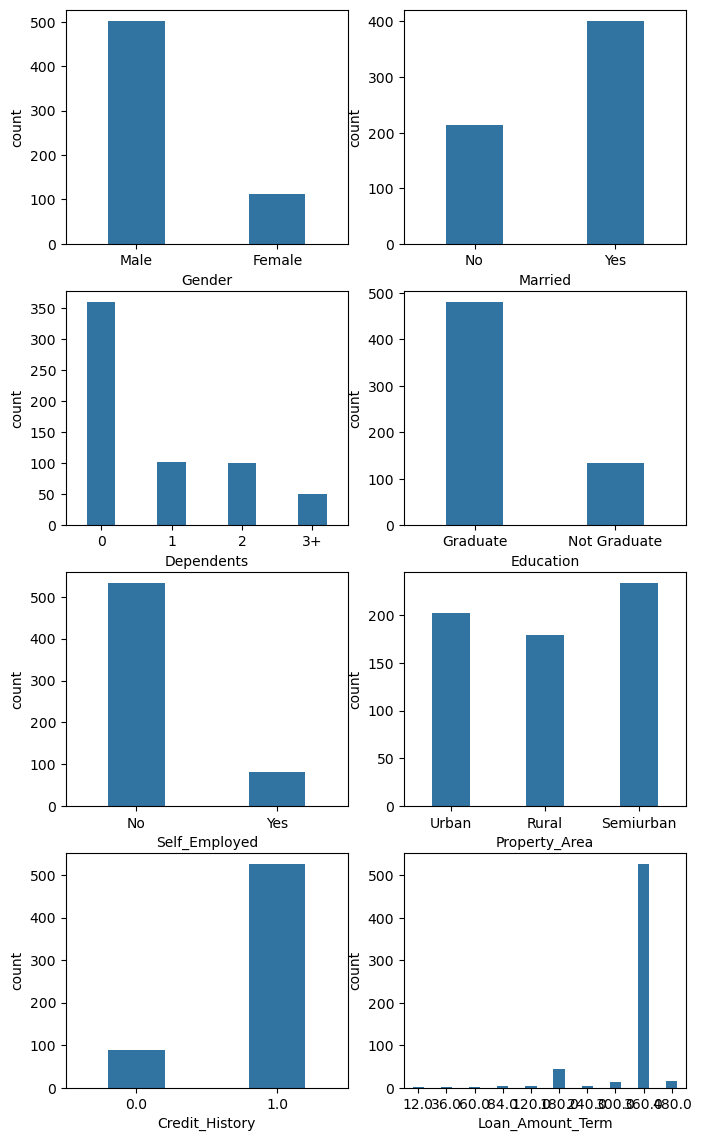

In [9]:
fig,axes = plt.subplots(4,2,figsize=(8,14))
for idx,col in enumerate(categorical_columns):
    row,column = idx//2,idx%2
    sns.countplot(x=col, data=df,ax = axes[row,column],width = 0.4)

In [10]:
for col_name in categorical_columns:
    col = df[col_name]
    print()
    for value, count in col.value_counts().items():
        percent =(count/df.shape[0]) * 100
        print(f"The percentage of {value} applicants in {col_name} variable is: {percent:.2f}%")
        


The percentage of Male applicants in Gender variable is: 81.76%
The percentage of Female applicants in Gender variable is: 18.24%

The percentage of Yes applicants in Married variable is: 65.31%
The percentage of No applicants in Married variable is: 34.69%

The percentage of 0 applicants in Dependents variable is: 58.63%
The percentage of 1 applicants in Dependents variable is: 16.61%
The percentage of 2 applicants in Dependents variable is: 16.45%
The percentage of 3+ applicants in Dependents variable is: 8.31%

The percentage of Graduate applicants in Education variable is: 78.18%
The percentage of Not Graduate applicants in Education variable is: 21.82%

The percentage of No applicants in Self_Employed variable is: 86.64%
The percentage of Yes applicants in Self_Employed variable is: 13.36%

The percentage of Semiurban applicants in Property_Area variable is: 37.95%
The percentage of Urban applicants in Property_Area variable is: 32.90%
The percentage of Rural applicants in Proper

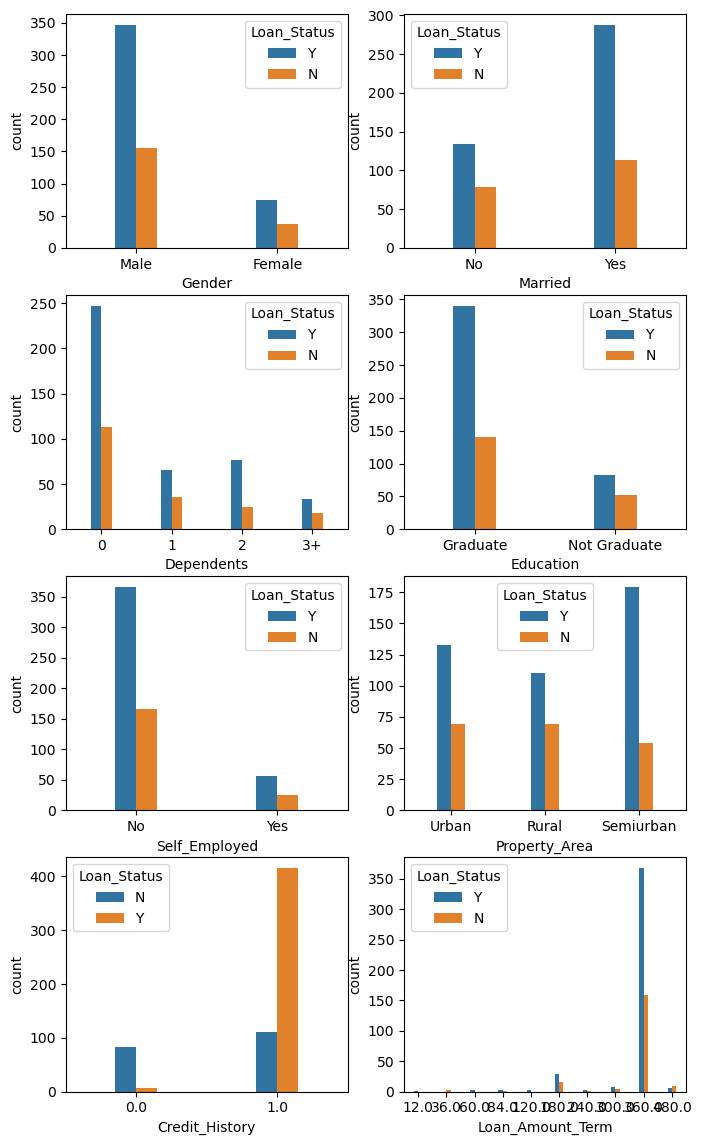

In [11]:
fig,axes = plt.subplots(4,2,figsize=(8,14))
for idx,col in enumerate(categorical_columns):
    row,column = idx//2,idx%2
    sns.countplot(x=col, data=df, ax=axes[row,column],hue='Loan_Status',width = 0.3)
   

In [12]:
df[numerical_columns].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,84.037468
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.250000
50%,3812.500000,1188.500000,129.000000
75%,5795.000000,2297.250000,164.750000
max,81000.000000,41667.000000,700.000000


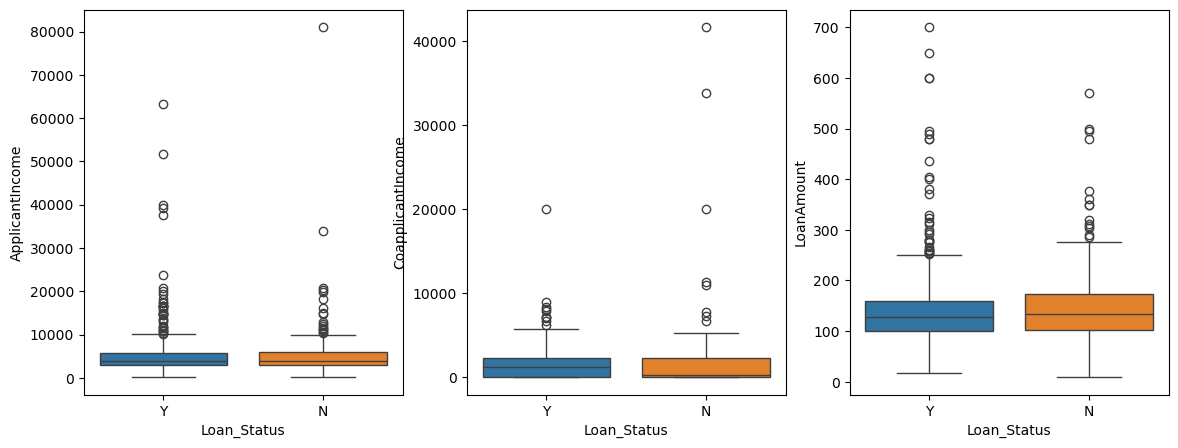

In [13]:
fig,axes = plt.subplots(1,3,figsize=(14,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=df,x='Loan_Status', hue = 'Loan_Status',ax=axes[idx])

<Axes: xlabel='LoanAmount', ylabel='Count'>

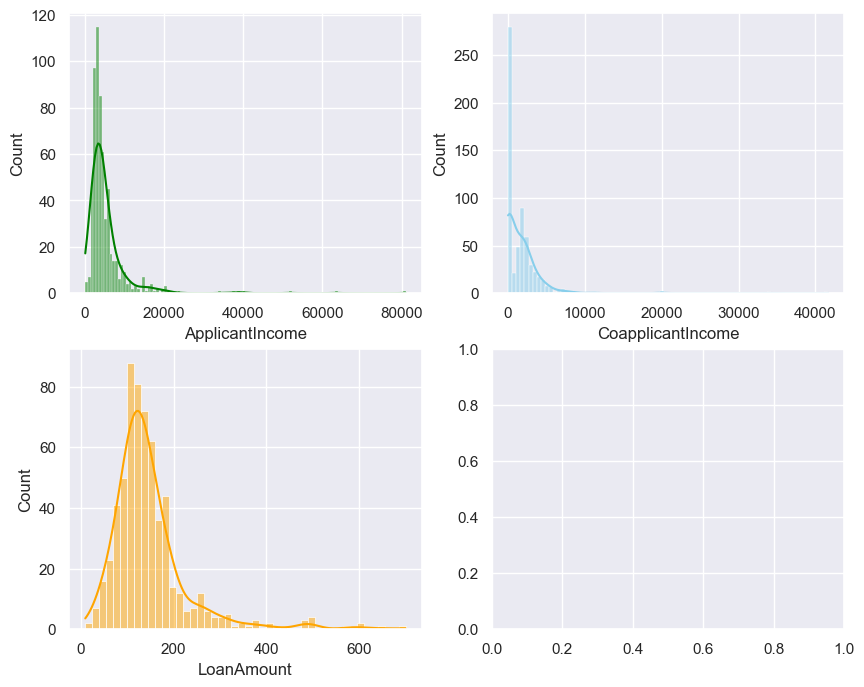

In [14]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10,8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax = axs[0,0], color= 'green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1],color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0],color='orange')

In [15]:
df = df.drop(['Loan_ID'], axis = 1)
df = pd.get_dummies(df)

#Drop Columns
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 'Self_Employed_No','Loan_Status_N'],axis = 1)

#Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed', 'Loan_Status_Y': 'Loan_Status'}

df.rename(columns=new, inplace=True)

In [16]:
df.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender', 'Married',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education', 'Self_Employed', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status'],
      dtype='object')

In [17]:
# Convert boolean columns to integers (True → 1, False → 0)
df = df.astype(int)

# Now calculate quantiles
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

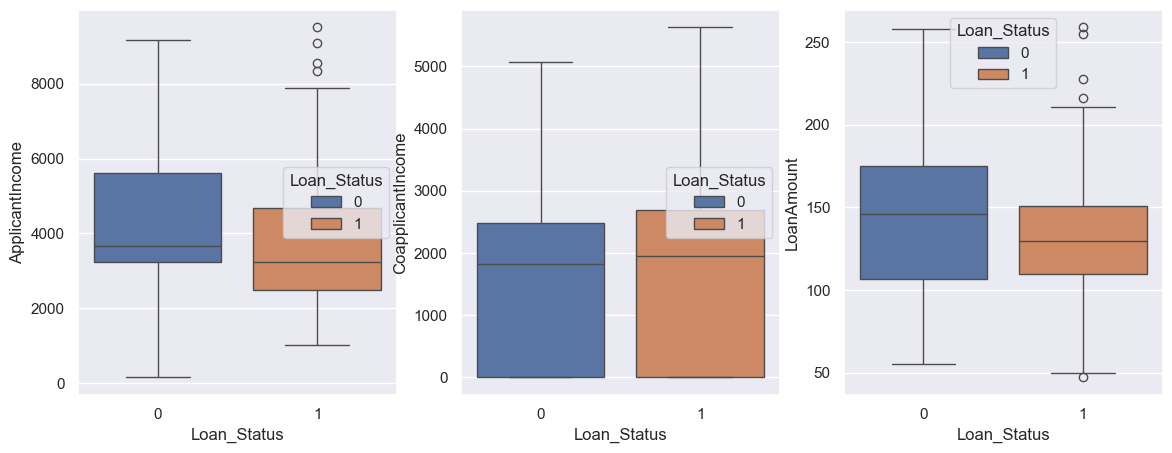

In [18]:
fig, axes = plt.subplots(1,3,figsize=(14,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=df,x='Loan_Status',hue = 'Loan_Status',ax=axes[idx])

In [19]:
df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)

<Axes: xlabel='LoanAmount', ylabel='Count'>

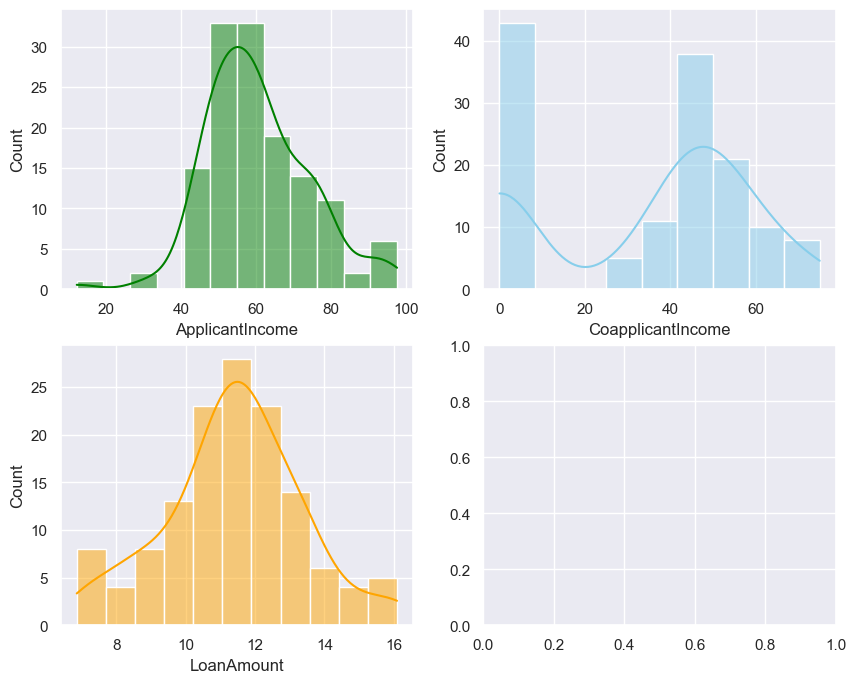

In [20]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10,8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax = axs[0,0], color= 'green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1],color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0],color='orange')

In [21]:
x = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]

C:\Users\laksh\AppData\Local\Temp\ipykernel_40396\1349213773.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=y, data=df, palette="coolwarm")


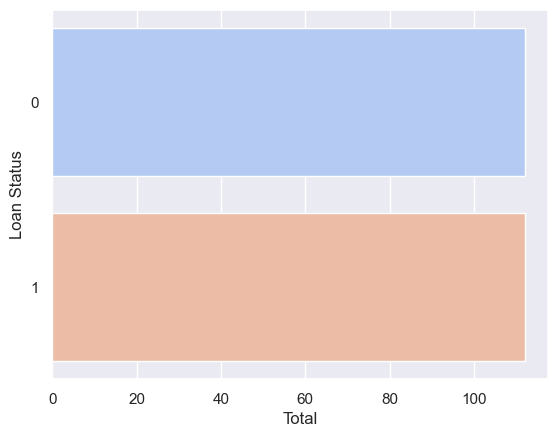

In [22]:
x, y = SMOTE().fit_resample(x, y)

sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=df, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

In [23]:
X = MinMaxScaler().fit_transform(x)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 0)

In [25]:
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy:  {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        23
           1       0.82      0.82      0.82        22

    accuracy                           0.82        45
   macro avg       0.82      0.82      0.82        45
weighted avg       0.82      0.82      0.82        45

[[19  4]
 [ 4 18]]
LR accuracy:  82.22%


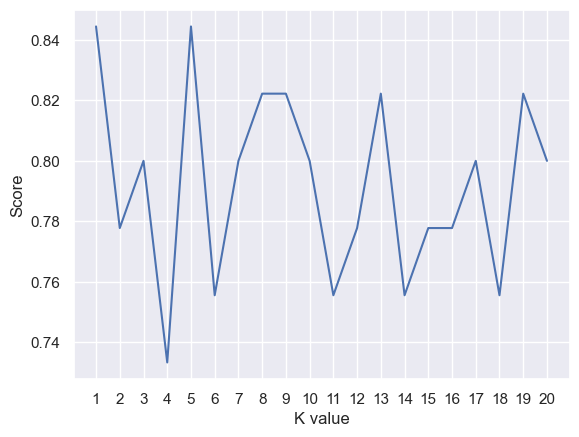

KNN best accuracy: 84.44%


In [26]:
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
    
    
plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

In [27]:
SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(X_train, y_train)


y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred, y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.94      0.70      0.80        23
           1       0.75      0.95      0.84        22

    accuracy                           0.82        45
   macro avg       0.85      0.83      0.82        45
weighted avg       0.85      0.82      0.82        45

[[16  7]
 [ 1 21]]
SVC accuracy: 82.22%


In [28]:
NBclassifier1 = CategoricalNB()
NBclassifier1.fit(X_train, y_train)


y_pred = NBclassifier1.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc1 = accuracy_score(y_pred,y_test)
print('Categorical Naive Bayes accuracy: {:.2f}%'.format(NBAcc1*100))

              precision    recall  f1-score   support

           0       0.66      0.83      0.73        23
           1       0.75      0.55      0.63        22

    accuracy                           0.69        45
   macro avg       0.70      0.69      0.68        45
weighted avg       0.70      0.69      0.68        45

[[19  4]
 [10 12]]
Categorical Naive Bayes accuracy: 68.89%


In [29]:
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Guassian Naive Bayes accuracy: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

           0       0.66      0.83      0.73        23
           1       0.75      0.55      0.63        22

    accuracy                           0.69        45
   macro avg       0.70      0.69      0.68        45
weighted avg       0.70      0.69      0.68        45

[[19  4]
 [10 12]]
Guassian Naive Bayes accuracy: 68.89%


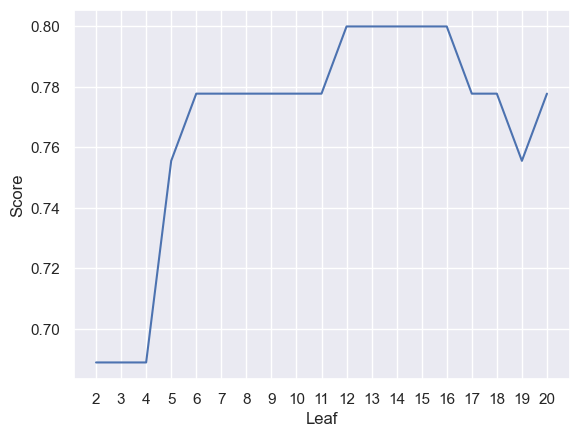

Decision Tree Accuracy: 80.00%


In [30]:
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
    
plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

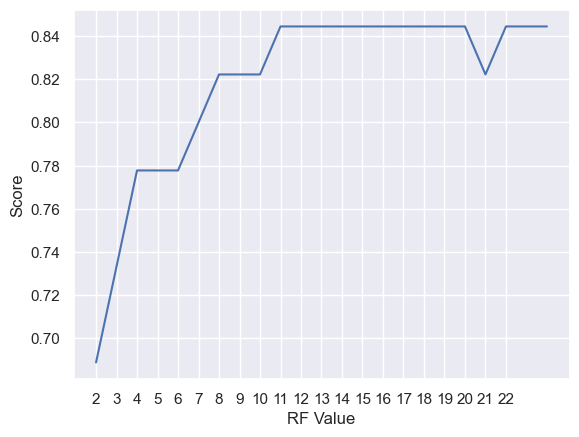

Random Forest Accuracy: 84.44%


In [31]:
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators=1000, random_state= 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    
    
plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,23,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc=max(scoreListRF)
print("Random Forest Accuracy: {:.2f}%".format(RFAcc*100))